In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
from keras.preprocessing.image import ImageDataGenerator

from keras.applications import MobileNet


In [33]:
!pwd
dataset='/content/drive/My Drive'
import os
train=os.path.join(dataset,'train')
test=os.path.join(dataset,'test')

/content


In [34]:
img_rows, img_cols = 224, 224 
input_tensor = shape=(224, 224, 3)

model=MobileNet(weights='imagenet',input_shape=(224,224,3),include_top=False)

#!/usr/bin/env python
# coding: utf-8

# In[1]:



for layer in model.layers:
    layer.trainable = False


# In[2]:


def layer_add(bottom_model):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(1,activation='sigmoid')(top_model)
    return top_model


# In[4]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

FC_Head = layer_add(model)

model = Model(inputs = model.input, outputs = FC_Head)

print(model.summary())


# In[5]:


from keras.preprocessing.image import ImageDataGenerator

train_data_dir =train
validation_data_dir = test
# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
batch_size = 16
 


# In[6]:


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,)






Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [35]:



from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate= 0.0001),
              metrics = ['accuracy'])





epochs = 10
batch_size = 32
nb_train_samples = 1137
nb_validation_samples = 37
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)


model.save('/content/drive/My Drive/face.hdf5')

Epoch 1/10
35/35 [==============================] - 375s 11s/step - loss: 0.0630 - accuracy: 0.9706 - val_loss: 5.1253e-05 - val_accuracy: 1.0000
Epoch 2/10
35/35 [==============================] - 368s 11s/step - loss: 4.4789e-06 - accuracy: 1.0000 - val_loss: 3.5944e-05 - val_accuracy: 1.0000
Epoch 3/10
35/35 [==============================] - 56s 2s/step - loss: 3.3857e-06 - accuracy: 1.0000 - val_loss: 2.8883e-05 - val_accuracy: 1.0000
Epoch 4/10
35/35 [==============================] - 39s 1s/step - loss: 3.1523e-06 - accuracy: 1.0000 - val_loss: 3.4388e-05 - val_accuracy: 1.0000
Epoch 5/10
35/35 [==============================] - 41s 1s/step - loss: 3.0398e-06 - accuracy: 1.0000 - val_loss: 2.5846e-05 - val_accuracy: 1.0000
Epoch 6/10
35/35 [==============================] - 37s 1s/step - loss: 2.9313e-06 - accuracy: 1.0000 - val_loss: 2.6207e-05 - val_accuracy: 1.0000
Epoch 7/10
35/35 [==============================] - 41s 1s/step - loss: 2.7267e-06 - accuracy: 1.0000 - val_loss

In [37]:



from keras.preprocessing import image
import os
from keras.models import load_model


model=load_model('/content/drive/My Drive/face.hdf5')



In [38]:
 import cv2
import numpy

In [64]:
img=image.load_img('/content/drive/My Drive/self.jpg',target_size=(224,224,3))

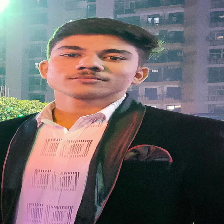

In [65]:
img

In [66]:
from keras.preprocessing import image
img=image.img_to_array(img)
img2=numpy.expand_dims(img, axis=0)
model.predict(img2)

array([[0.99999464]], dtype=float32)